# General Assembly DSI - Denver 2018
## Capstone Project - DFS Model
This is my capstone project at General Assembly's fifth [Data Science Immersive](https://generalassemb.ly/education/data-science-immersive) cohort in 2018. I am developing a model to assist in optimizing NFL lineups on the daily fantasy sports platforms [Draft Kings](https://www.draftkings.com/) and [Fan Duel](https://www.fanduel.com/).

### Problem Statement

Can we build a model to predict a football player’s fantasy football performance to estimate their value and implement the model in conjunction with a daily fantasy strategy to be profitable?

### Exploratory Data Analysis (EDA)
There was a lot of EDA performed in the data gathering & cleaning portion of this project. This EDA will seek to further explore the relationships between features, and perform a final preprocessing of the data to prepare for modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/receivers_final.csv')

In [3]:
df.head()

,Week,Year,Name,Team,h/a,Oppt,FD points,FD salary,Opp_Rank,Opp_Avg_Rec_Allowed,...,O/U,Weather,Temperature,Wind,Age,Month,Rec_TDs,Rec_Yds,Receptions,Targets
0,2,2011,"Jackson, DeSean",PHI,a,ATL,3.1,7300.0,25,10.0,...,49.5,DOME,72.0,0.0,24.291,9,0.333333,59.000000,3.666667,5.666667
1,2,2011,"Jones, Julio",ATL,h,PHI,3.9,5500.0,3,13.0,...,49.5,DOME,72.0,0.0,22.227,9,1.333333,105.666667,5.333333,9.333333
2,2,2011,"Britt, Kenny",TEN,h,BAL,24.0,7300.0,30,12.0,...,39.0,Sunny,79.0,1.0,22.364,9,2.000000,136.000000,5.000000,10.000000
3,2,2011,"Decker, Eric",DEN,h,CIN,23.8,4500.0,2,7.0,...,41.0,Sunny,73.0,6.0,24.187,9,0.000000,18.333333,1.333333,4.333333
4,2,2011,"Green, A.J.",CIN,a,DEN,23.4,5500.0,16,6.0,...,41.0,Sunny,73.0,6.0,23.049,9,0.000000,66.333333,4.333333,8.000000


In [4]:
df.shape

(6574, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 25 columns):
Week                       6574 non-null int64
Year                       6574 non-null int64
Name                       6574 non-null object
Team                       6574 non-null object
h/a                        6574 non-null object
Oppt                       6574 non-null object
FD points                  6574 non-null float64
FD salary                  6574 non-null float64
Opp_Rank                   6574 non-null int64
Opp_Avg_Rec_Allowed        6574 non-null float64
Opp_Avg_Targets_Allowed    6574 non-null float64
Opp_Avg_TDs_Allowed        6574 non-null float64
Opp_Avg_Yds_Allowed        6574 non-null float64
Favored                    6574 non-null object
Spread                     6574 non-null float64
O/U                        6574 non-null float64
Weather                    6574 non-null object
Temperature                6574 non-null float64
Wind                   

### Column Transformations
- Rearrange `Month` to the front of the pack and encode
- One-hot-encode `h/a` and `Favored`
- Dummy weather

In [6]:
# dummy weather
df = pd.get_dummies(df, columns = ['Weather'])

In [10]:
# rearrange columns
df_cols = ['Name', 'Year', 'Week', 'Month', 'Team', 'Oppt', 'Age', 'h/a',
           'Favored', 'Spread', 'O/U', 'Temperature', 'Wind', 'Receptions', 'Targets', 
           'Rec_TDs', 'Rec_Yds', 'Opp_Rank', 'Opp_Avg_Rec_Allowed', 'Opp_Avg_Targets_Allowed',
           'Opp_Avg_TDs_Allowed', 'Opp_Avg_Yds_Allowed', 'Weather_DOME', 'Weather_Fog', 'Weather_Rain',
           'Weather_Rain | Fog', 'Weather_Snow', 'Weather_Snow | Fog','Weather_Snow | Freezing Rain', 
           'Weather_Sunny', 'FD salary', 'FD points']

df = df[df_cols]

In [16]:
# converting month to name
df['Month'] = df['Month'].map({9: 'September', 10: 'October', 11: 'November', 12: 'December', 1: 'January'})

In [18]:
# one-hot 'h/a'
df['h/a'] = df['h/a'].map({'h': 1, 'a': 0})

In [20]:
# one-hot 'Favored'
for index, player in df.iterrows():
    if player['Favored'] == player['Team']:
        df.loc[index, 'Favored'] = 1
    else:
        df.loc[index, 'Favored'] = 0

In [22]:
df = df.groupby(['Name', 'Year', 'Week', 'Month', 'Team', 'Oppt']).sum()

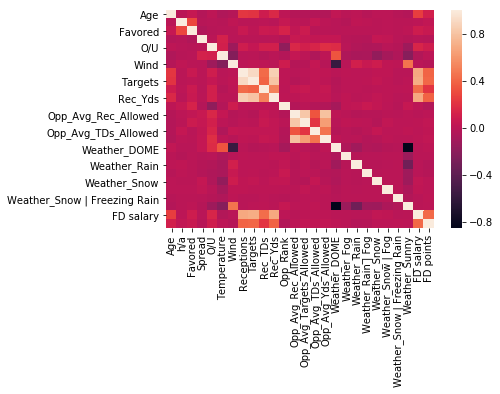

In [24]:
# multicollinearity?
sns.heatmap(df.corr());

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/charleydixon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


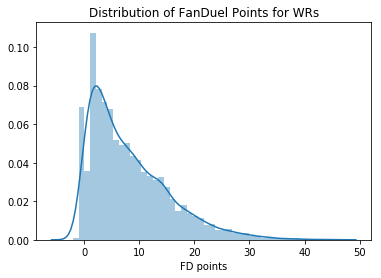

In [25]:
sns.distplot(df['FD points']).set_title('Distribution of FanDuel Points for WRs');

In [39]:
df[['FD points']].describe()[1:]

,FD points
mean,8.160222
std,7.155204
min,-2.000000
25%,2.500000
50%,6.300000
75%,12.200000
max,45.400000


> About the same as runningbacks... innnnnteresting.

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


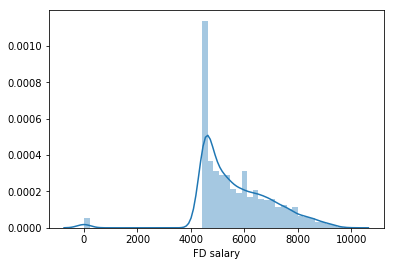

In [27]:
sns.distplot(df['FD salary']);

In [38]:
df[['FD salary']].describe()[1:]

,FD salary
mean,5703.011865
std,1362.360533
min,0.000000
25%,4600.000000
50%,5400.000000
75%,6600.000000
max,9900.000000


> A lot more players at this position which means a lot more guys getting assigned the "default" salary of 4500 dollars it would appear.

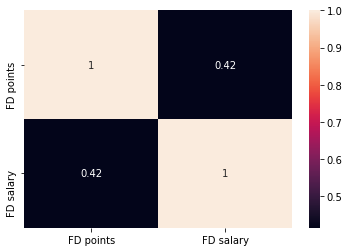

In [29]:
sns.heatmap(df[['FD points', 'FD salary']].corr(), annot = True);

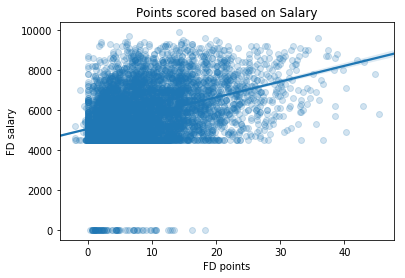

In [30]:
sns.regplot(df['FD points'], df['FD salary'], scatter_kws = {'alpha': 0.2}).set_title('Points scored based on Salary');

### Summarize Relationships to Target
I will group columns by their "category"
- Betting / Lines
- Player Stats
- Opponent / Defense Stats
- Weather

#### Betting & Lines

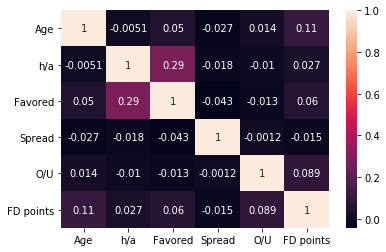

In [31]:
# betting info versus FD points
betting_cols = ['Age', 'h/a', 'Favored', 'Spread', 'O/U', 'FD points']
sns.heatmap(df[betting_cols].corr(), annot = True);

#### Points scored compared to player stats
It is important to remember when analyzing these that the statistics represent a player's 3-game average leading up to the contest in which they scored the target variable.

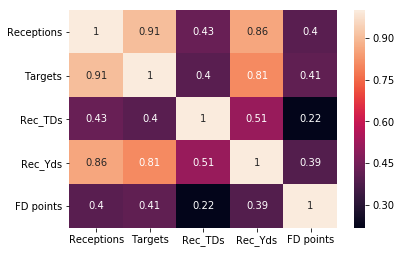

In [34]:
# player stats relationship with FD points
player_stat_columns = ['Receptions', 'Targets', 'Rec_TDs', 'Rec_Yds', 'FD points']
sns.heatmap(df[player_stat_columns].corr(), annot = True);

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


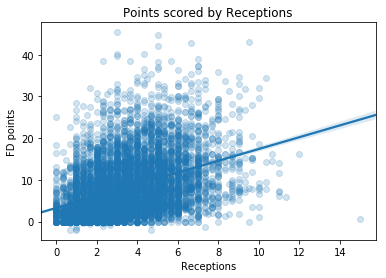

In [35]:
sns.regplot(df['Receptions'], df['FD points'], scatter_kws = {'alpha': 0.2}).set_title('Points scored by Receptions');

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


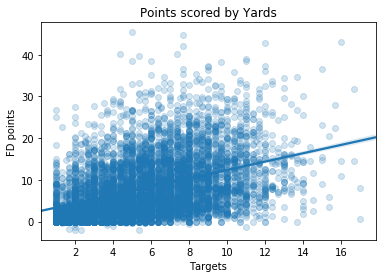

In [36]:
sns.regplot(df['Targets'], df['FD points'], scatter_kws = {'alpha': 0.2}).set_title('Points scored by Yards');

In [37]:
df[df['FD points'] > 40]

Age  h/a  Favored  Spread  \
Name             Year Week Month    Team Oppt                                 
Decker, Eric     2013 13   December DEN  KC    26.261    0        1    -6.0   
Gordon, Josh     2013 13   December CLE  JAX   22.232    1        1    -7.5   
Hopkins, DeAndre 2014 13   November HOU  TEN   22.177    1        1    -7.0   
Jeffery, Alshon  2013 13   December CHI  MIN   23.290    0        0    -1.0   
Jones, Julio     2016 4    October  ATL  CAR   27.242    1        0    -3.0   
                 2017 12   November ATL  TB    28.296    1        1   -10.0   
Jones, Marvin    2013 8    October  CIN  NYJ   23.229    1        1    -4.5   

                                                O/U  Temperature  Wind  \
Name             Year Week Month    Team Oppt                            
Decker, Eric     2013 13   December DEN  KC    50.0         55.0   4.0   
Gordon, Josh     2013 13   December CLE  JAX   39.0         44.0   8.0   
Hopkins, DeAndre 2014 13   November HOU  TEN   42.5         78.0  10.0   
Jeffery, Alshon  2013 13   December CHI  MIN   50.5         72.0   0.0   
Jones, Julio     2016 4    October  ATL  CAR   48.5         72.0   0.0   
                 2017 12   November ATL  TB    48.5         72.0   0.0   
Jones, Marvin    2013 8    October  CIN  NYJ   41.5         57.0   3.0   

                                               Receptions    Targets  \
Name             Year Week Month    Team Oppt                          
Decker, Eric     2013 13   December DEN  KC      3.000000   5.000000   
Gordon, Josh     2013 13   December CLE  JAX     9.500000  16.000000   
Hopkins, DeAndre 2014 13   November HOU  TEN     4.333333   7.333333   
Jeffery, Alshon  2013 13   December CHI  MIN     6.666667  12.000000   
Jones, Julio     2016 4    October  ATL  CAR     5.000000   7.666667   
                 2017 12   November ATL  TB      5.000000   7.666667   
Jones, Marvin    2013 8    October  CIN  NYJ     3.000000   4.333333   

                                                Rec_TDs    ...      \
Name             Year Week Month    Team Oppt              ...       
Decker, Eric     2013 13   December DEN  KC    0.000000    ...       
Gordon, Josh     2013 13   December CLE  JAX   1.000000    ...       
Hopkins, DeAndre 2014 13   November HOU  TEN   0.333333    ...       
Jeffery, Alshon  2013 13   December CHI  MIN   0.000000    ...       
Jones, Julio     2016 4    October  ATL  CAR   0.333333    ...       
                 2017 12   November ATL  TB    0.000000    ...       
Jones, Marvin    2013 8    October  CIN  NYJ   0.666667    ...       

                                               Weather_DOME  Weather_Fog  \
Name             Year Week Month    Team Oppt                              
Decker, Eric     2013 13   December DEN  KC               0            0   
Gordon, Josh     2013 13   December CLE  JAX              0            0   
Hopkins, DeAndre 2014 13   November HOU  TEN              0            0   
Jeffery, Alshon  2013 13   December CHI  MIN              1            0   
Jones, Julio     2016 4    October  ATL  CAR              1            0   
                 2017 12   November ATL  TB               1            0   
Jones, Marvin    2013 8    October  CIN  NYJ              0            0   

                                               Weather_Rain  \
Name             Year Week Month    Team Oppt                 
Decker, Eric     2013 13   December DEN  KC               0   
Gordon, Josh     2013 13   December CLE  JAX              0   
Hopkins, DeAndre 2014 13   November HOU  TEN              0   
Jeffery, Alshon  2013 13   December CHI  MIN              0   
Jones, Julio     2016 4    October  ATL  CAR              0   
                 2017 12   November ATL  TB               0   
Jones, Marvin    2013 8    October  CIN  NYJ              0   

                                               Weather_Rain | Fog  \
Name             Year Week Month    Team Oppt                       


In [41]:
df[df['Targets'] > 15][player_stat_columns]

Receptions    Targets  \
Name              Year Week Month     Team Oppt                          
Allen, Keenan     2015 2    September LAC  CIN    15.000000  17.000000   
Brown, Antonio    2016 4    October   PIT  KC      9.666667  15.333333   
                  2017 15   December  PIT  NE      9.666667  15.333333   
Gordon, Josh      2013 13   December  CLE  JAX     9.500000  16.000000   
                       14   December  CLE  NE      9.666667  15.666667   
                  2014 13   November  CLE  BUF     8.000000  16.000000   
Hopkins, DeAndre  2015 5    October   HOU  IND     7.333333  15.666667   
                       6    October   HOU  JAX     9.333333  16.666667   
                       7    October   HOU  MIA    10.000000  17.000000   
                  2017 10   November  HOU  LAR     7.000000  16.000000   
Jones, Julio      2015 4    October   ATL  HOU    11.333333  15.333333   
Marshall, Brandon 2012 15   December  CHI  GB     10.666667  16.666667   

                                                  Rec_TDs     Rec_Yds  \
Name              Year Week Month     Team Oppt                         
Allen, Keenan     2015 2    September LAC  CIN   0.000000  166.000000   
Brown, Antonio    2016 4    October   PIT  KC    0.333333  122.000000   
                  2017 15   December  PIT  NE    1.000000  161.000000   
Gordon, Josh      2013 13   December  CLE  JAX   1.000000  181.000000   
                       14   December  CLE  NE    1.333333  207.666667   
                  2014 13   November  CLE  BUF   0.000000  120.000000   
Hopkins, DeAndre  2015 5    October   HOU  IND   0.333333  103.666667   
                       6    October   HOU  JAX   0.333333  142.333333   
                       7    October   HOU  MIA   0.666667  158.000000   
                  2017 10   November  HOU  LAR   1.000000   55.000000   
Jones, Julio      2015 4    October   ATL  HOU   1.000000  159.000000   
Marshall, Brandon 2012 15   December  CHI  GB    0.333333  139.000000   

                                                 FD points  
Name              Year Week Month     Team Oppt             
Allen, Keenan     2015 2    September LAC  CIN         0.6  
Brown, Antonio    2016 4    October   PIT  KC         20.4  
                  2017 15   December  PIT  NE          3.4  
Gordon, Josh      2013 13   December  CLE  JAX        43.1  
                       14   December  CLE  NE         28.0  
                  2014 13   November  CLE  BUF        11.0  
Hopkins, DeAndre  2015 5    October   HOU  IND        22.4  
                       6    October   HOU  JAX        31.8  
                       7    October   HOU  MIA         8.0  
                  2017 10   November  HOU  LAR        14.6  
Jones, Julio      2015 4    October   ATL  HOU         5.8  
Marshall, Brandon 2012 15   December  CHI  GB         14.6

#### Points scored based on weather conditions

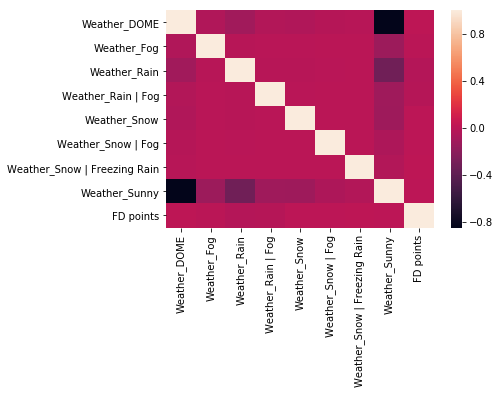

In [42]:
# weather columns
weather_columns = ['Weather_DOME', 'Weather_Fog', 'Weather_Rain', 'Weather_Rain | Fog', 'Weather_Snow',
                   'Weather_Snow | Fog', 'Weather_Snow | Freezing Rain', 'Weather_Sunny', 'FD points']
sns.heatmap(df[weather_columns].corr());

#### Points scored based on defensive stats against opponent
It is important to remember that these stats are rolling averages for the three games leading up to an opponent.

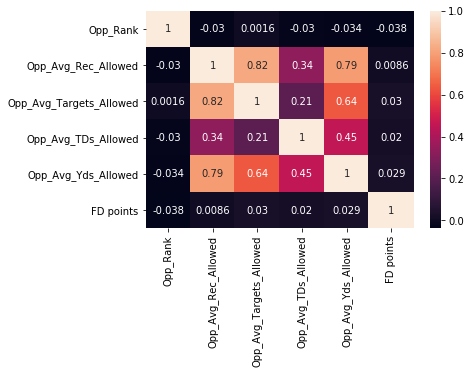

In [43]:
# defensive stats
def_stat_columns = ['Opp_Rank', 'Opp_Avg_Rec_Allowed', 'Opp_Avg_Targets_Allowed', 
                    'Opp_Avg_TDs_Allowed', 'Opp_Avg_Yds_Allowed', 'FD points']
sns.heatmap(df[def_stat_columns].corr(), annot = True);

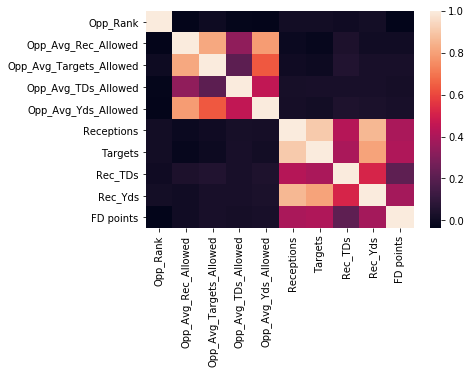

In [45]:
# how do player stats compare to defensive stats?
stats = def_stat_columns + player_stat_columns

# removing second FD points column
stats = stats[:5] + stats[6:]
sns.heatmap(df[stats].corr(), annot = False);

In [46]:
df

Age  h/a  Favored  Spread  \
Name            Year Week Month     Team Oppt                                 
Adams, Davante  2014 2    September GB   NYJ   21.264    1        1    -7.0   
                     3    September GB   DET   21.271    0        0    -1.5   
                     4    September GB   CHI   21.278    0        1    -2.0   
                     5    October   GB   MIN   21.282    1        1    -8.5   
                     6    October   GB   MIA   21.292    0        1    -1.5   
                     7    October   GB   CAR   21.299    1        1    -6.5   
                     8    October   GB   NO    21.306    0        0    -2.0   
                     11   November  GB   PHI   21.327    1        1    -4.5   
                     12   November  GB   MIN   21.334    0        1    -7.5   
                     13   November  GB   NE    21.341    1        1    -3.0   
                     15   December  GB   BUF   21.355    0        1    -3.5   
                     16   December  GB   TB    21.362    0        1   -11.5   
                2015 2    September GB   SEA   22.270    1        1    -3.0   
                     3    September GB   KC    22.278    1        1    -5.5   
                     8    November  GB   DEN   22.312    0        1    -2.5   
                     9    November  GB   CAR   22.319    0        1    -2.5   
                     10   November  GB   DET   22.326    1        1   -10.5   
                     11   November  GB   MIN   22.333    0        0     0.0   
                     12   November  GB   CHI   22.337    1        1    -8.0   
                     13   December  GB   DET   22.344    0        1    -2.5   
                     14   December  GB   DAL   22.354    1        1    -6.5   
                     15   December  GB   OAK   22.361    0        1    -4.0   
                     16   December  GB   ARI   23.003    0        0    -6.0   
                2016 2    September GB   MIN   23.269    0        1    -2.0   
                     3    September GB   DET   23.276    1        1    -6.5   
                     5    October   GB   NYG   23.290    1        1    -7.0   
                     6    October   GB   DAL   23.297    1        1    -5.0   
                     7    October   GB   CHI   23.301    1        1    -7.5   
                     8    October   GB   ATL   23.311    0        0    -3.0   
                     9    November  GB   IND   23.318    1        1    -7.5   
...                                               ...  ...      ...     ...   
Wright, Kendall 2015 3    September TEN  IND   25.319    1        0    -3.5   
                     5    October   TEN  BUF   25.333    1        0    -1.0   
                     6    October   TEN  MIA   25.340    1        1    -2.5   
                     7    October   TEN  ATL   25.347    1        0    -6.0   
                     8    November  TEN  HOU   25.354    0        0    -3.5   
                     12   November  TEN  OAK   26.017    1        0    -1.0   
                     13   December  TEN  JAX   26.024    1        1    -3.0   
                     16   December  TEN  HOU   26.045    1        0    -3.5   
                2016 4    October   TEN  HOU   26.325    0        0    -3.5   
                     5    October   TEN  MIA   26.332    0        0    -2.5   
                     6    October   TEN  CLE   26.339    1        1    -7.5   
                     7    October   TEN  IND   26.346    1        1    -4.0   
                     8    October   TEN  JAX   26.350    1        1    -3.0   
                     9    November  TEN  LAC   26.360    0        0    -3.5   
                     11   November  TEN  IND   27.008    0        0    -3.0   
                     15   December  TEN  KC    27.036    0        0    -6.0   
                     16   December  TEN  JAX   27.042    0        1    -4.0   
                2017 2    September CHI  TB    27.309    0        0    -7.0   
                     

In [47]:
df.to_csv('../data/modeling_wrs.csv', index = True) # remember to include index